<a href="https://colab.research.google.com/github/isaacperomero/cancer_diagnosis_app/blob/main/cancer_diagnosis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Investigación - Bioinformática**
Modelo simple de aprendizaje automático (ML) a partir de datos sobre el cáncer de mama

---

## **Instalación e importación de librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

## **Importación del dataset**

In [ ]:
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
df_url = 'https://raw.githubusercontent.com/isaacperomero/Bioinformatics/main/breast_cancer_data.csv'
df = pd.read_csv(df_url)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **Tratamiento de la información**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.set_index('id')

In [ ]:
df = df.dropna(axis = 1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# Transformación de valores categóricos a numerales
# B= 0, M= 1
df['diagnosis'] = df['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
df['diagnosis'] = df['diagnosis'].astype("float64")

# Otra forma
# lb = LabelEncoder()
# df.iloc[:, 1] = lb.fit_transform(df.iloc[:, 1].values)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
df['diagnosis'].value_counts()

diagnosis
0.0    357
1.0    212
Name: count, dtype: int64

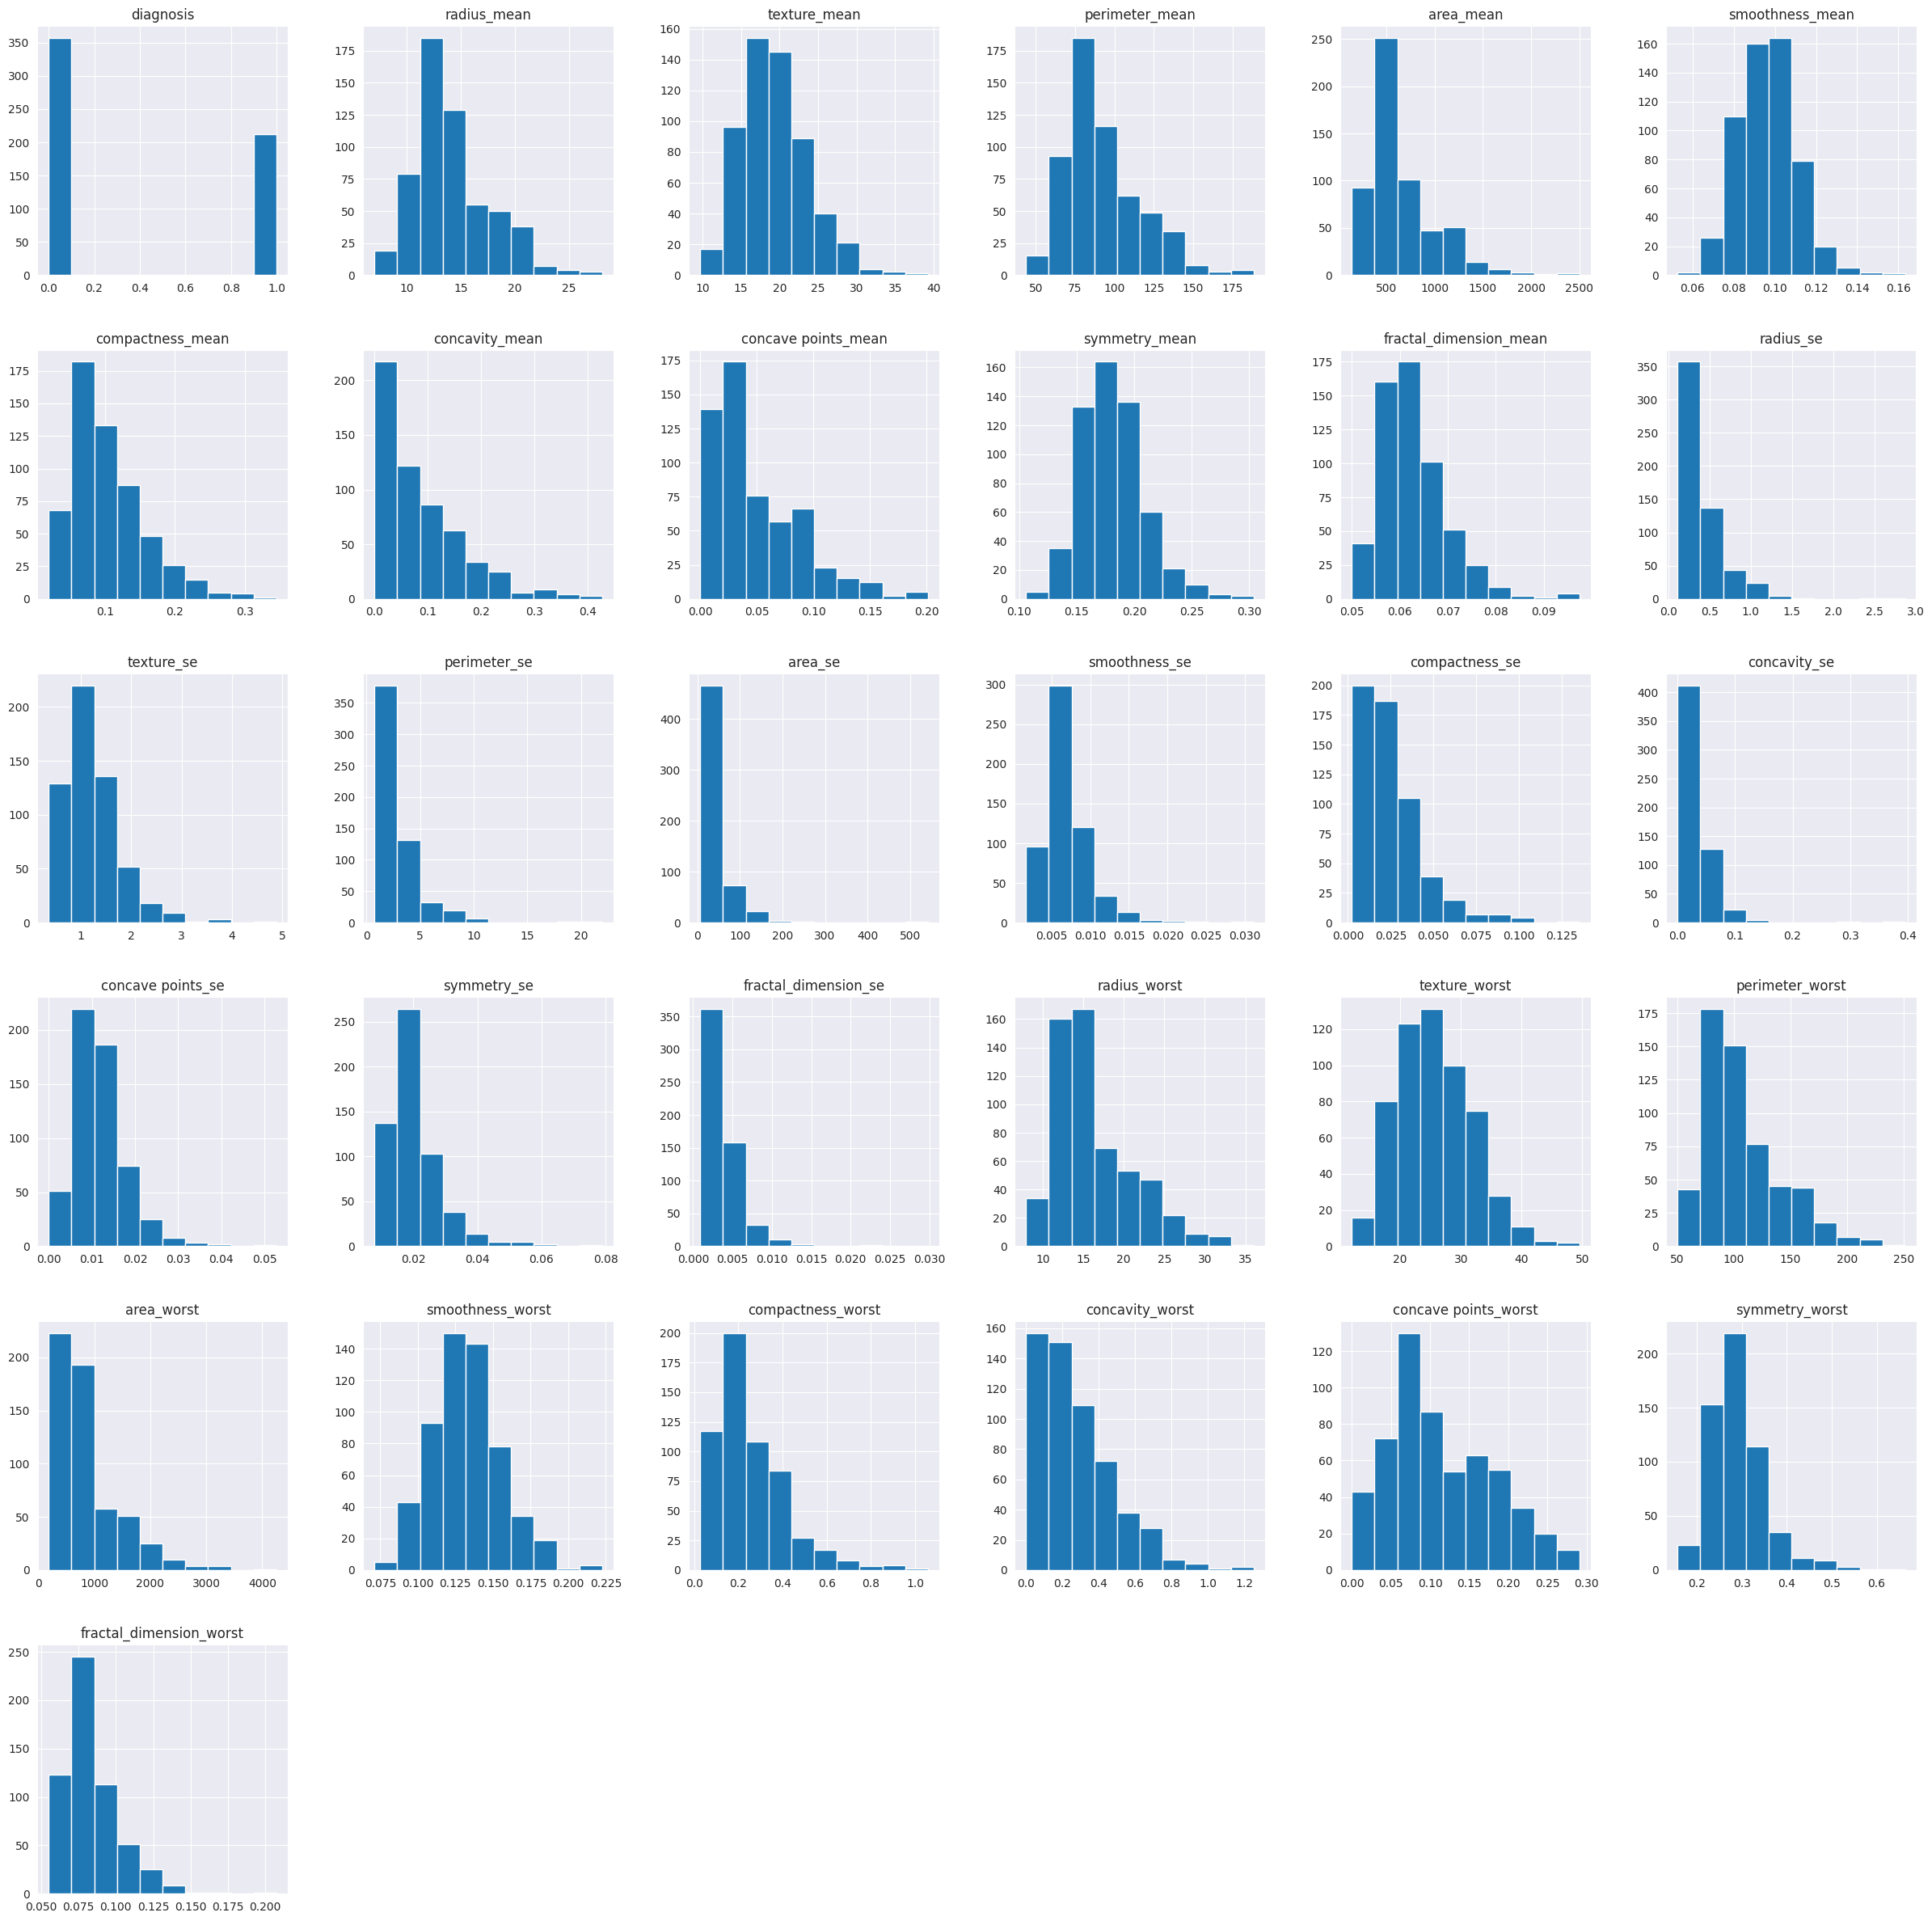

In [ ]:
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

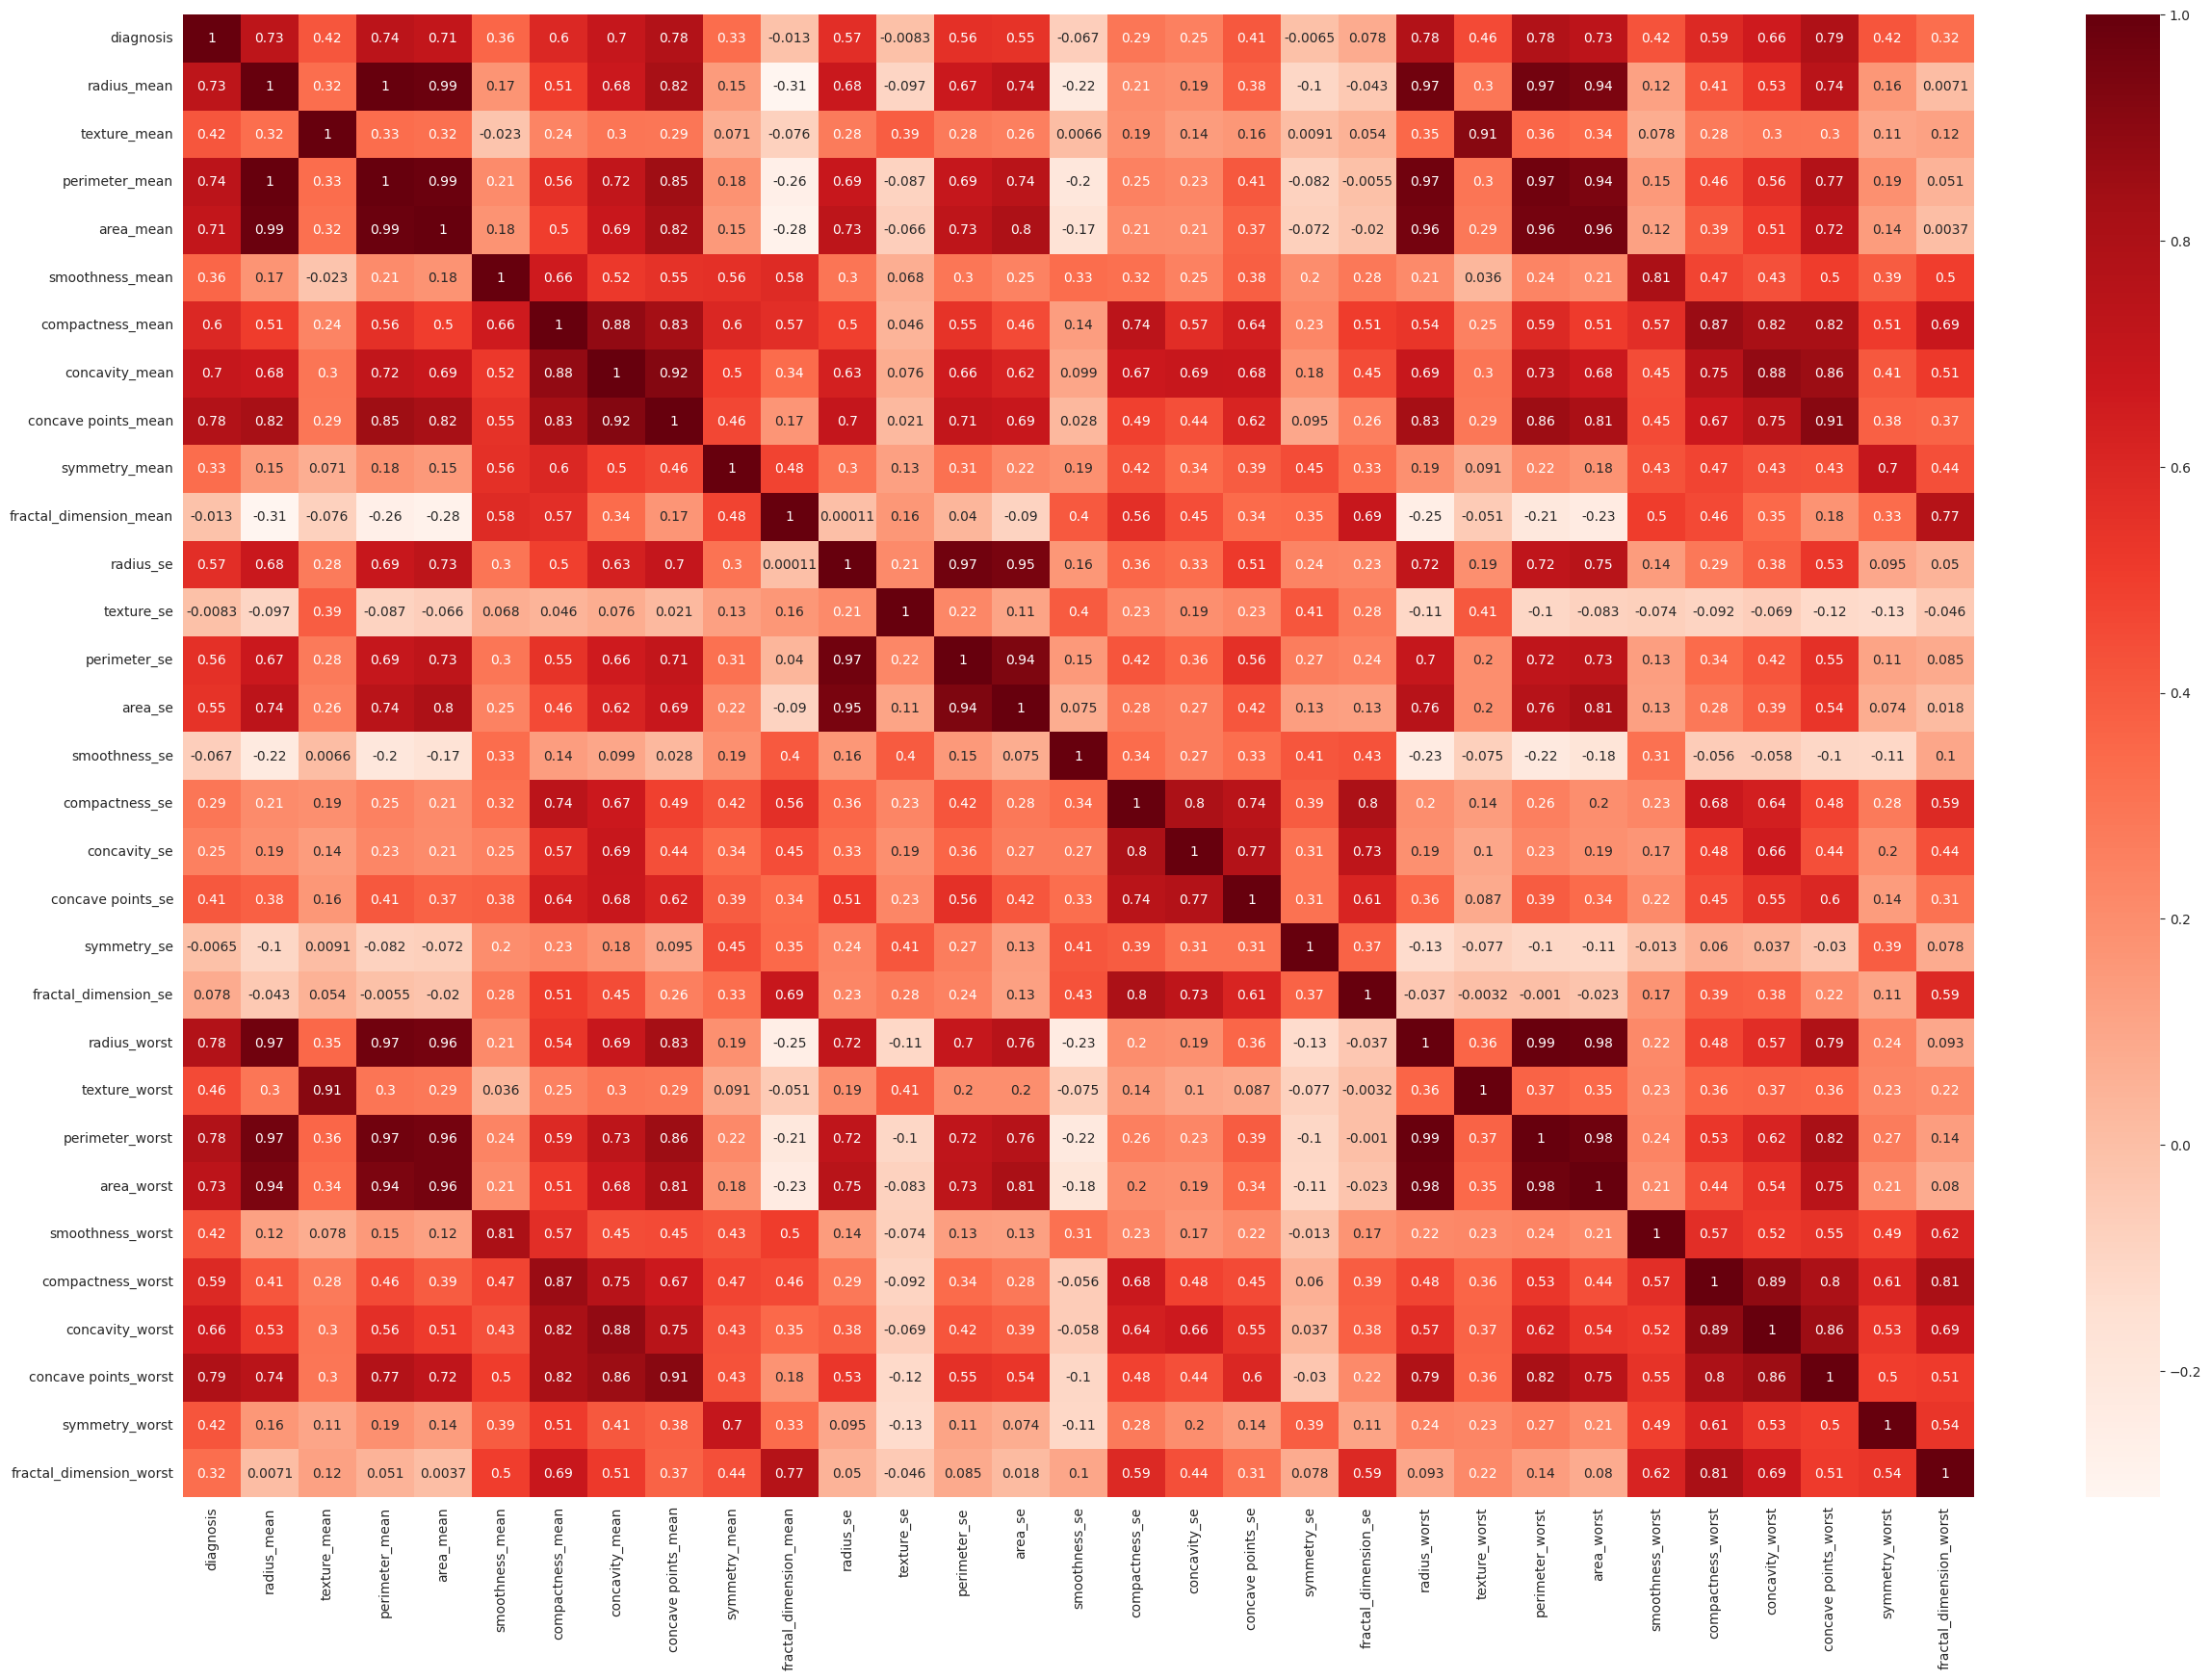

In [ ]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Correlación con la variable de salida
cor_target = abs(cor["diagnosis"])
# Selección de variables altamente correlacionadas
relevant_features = cor_target[cor_target>0.7]
relevant_features

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [ ]:
df.to_csv('diagnosis_list.csv', index = False)

# **Construcción del modelo de ML**

In [ ]:
Y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1).values

# Otra forma
# X = df.iloc[:, 2:32].values
# Y = df.iloc[:, 1].values

In [ ]:
# División del conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

# **Comparación de los modelos de ML**

In [ ]:
scoring = 'accuracy'

Analizar y construir un modelo para predecir si un conjunto dado de síntomas conduce al cáncer de mama se trata de un problema de clasificación binaria.

Como no se sabe cuál será el mejor en ese momento, se hace una prueba rápida con los pocos algoritmos apropiados con la configuración predeterminada para obtener una primera indicación de cómo funciona cada uno de ellos.

Se utiliza una validación cruzada de 10 veces para cada prueba.

Se utilizan los siguientes algoritmos no lineales:

* Classification and Regression Trees (CART)
* Linear Support Vector Machines (SVM)
* Gaussian Naive Bayes (NB)
* k-Nearest Neighbors (KNN)

In [ ]:
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Para el modelo %s: La precisión promedio es: %f (Precisión estándar es: %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Para el modelo CART: La precisión promedio es: 0.925362 (Precisión estándar es: 0.039678)
Para el modelo SVM: La precisión promedio es: 0.907681 (Precisión estándar es: 0.054723)
Para el modelo NB: La precisión promedio es: 0.940773 (Precisión estándar es: 0.033921)
Para el modelo KNN: La precisión promedio es: 0.927729 (Precisión estándar es: 0.055250)


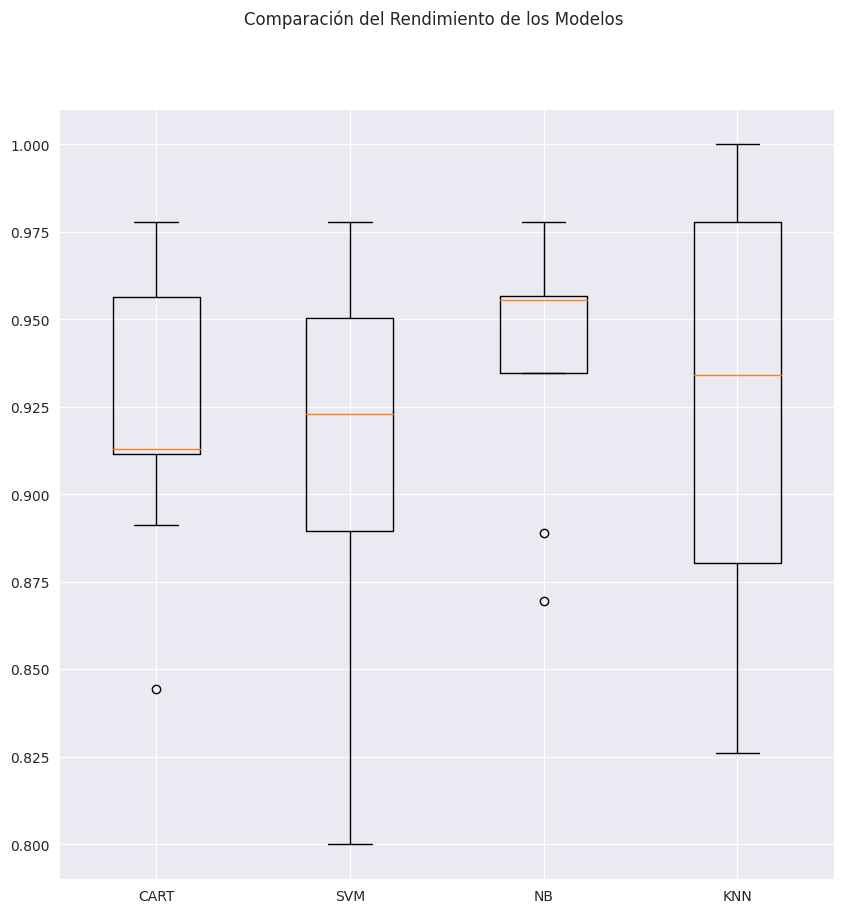

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparación del Rendimiento de los Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import warnings
pipelines = []

pipelines.append(('CART Escalado', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('SVM Escalado', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('NB Escalado', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('KNN Escalado', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []

kfold = KFold(n_splits= 10)
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print( "Para el modelo %s: La precisión promedio es: %f (Precisión estándar es: %f)" % (name, cv_results.mean(), cv_results.std()))

Para el modelo CART Escalado: La precisión promedio es: 0.925411 (Precisión estándar es: 0.047429)
Para el modelo SVM Escalado: La precisión promedio es: 0.964879 (Precisión estándar es: 0.038621)
Para el modelo NB Escalado: La precisión promedio es: 0.931932 (Precisión estándar es: 0.038625)
Para el modelo KNN Escalado: La precisión promedio es: 0.958357 (Precisión estándar es: 0.038595)


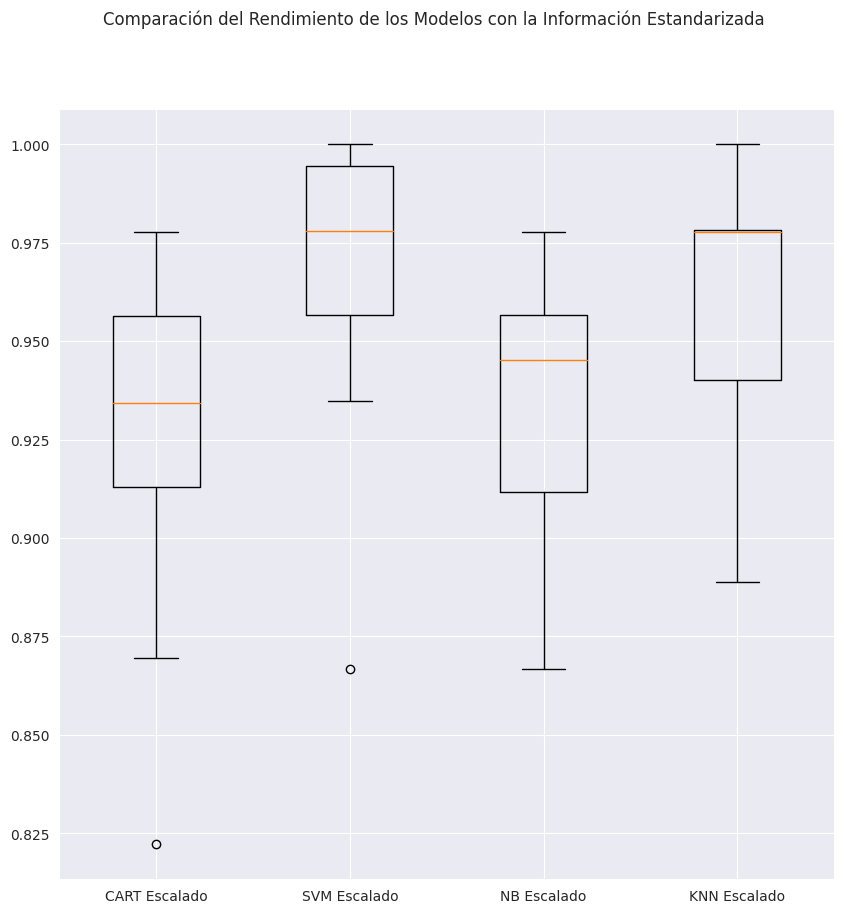

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparación del Rendimiento de los Modelos con la Información Estandarizada')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Realizar predicciones sobre el conjunto de datos de validación

for name, model in models:
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    model.fit(X_train_scaled, Y_train)
    X_test_scaled = scaler.transform(X_test)
    predictions = model.predict(X_test_scaled)
    print("\nModelo:",name)
    print("Puntuación de precisión:" % accuracy_score(Y_test, predictions))
    print("Reporte de Clasificación:\n",classification_report(Y_test, predictions))
    print("Matriz de Confusión:\n",confusion_matrix(Y_test, predictions))


# Accuracy - ratio of correctly predicted observation to the total observations.
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false



Modelo: CART
Puntuación de precisión:
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        75
         1.0       0.85      0.90      0.88        39

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114

Matriz de Confusión:
 [[69  6]
 [ 4 35]]

Modelo: SVM
Puntuación de precisión:
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        75
         1.0       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Matriz de Confusión:
 [[74  1]
 [ 1 38]]

Modelo: NB
Puntuación de precisión:
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0  

# **Aplicación del modelo Logistic Regression**

**Nota:** Si bien el modelo de Logistic Regression no se probó en la etapa anterior, se sabe que este da buenos resultados para problemas de clasificación binaria con el presente en este caso. Además, se obtuvo un mayor rendimiento comparado a los otros modelos.

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(Y_test, Y_pred)
classification_report = classification_report(Y_test, Y_pred)
print(f'Puntuación de precisión: {accuracy}')
print(f'Reporte de clasificación: \n  {classification_report}')

Puntuación de precisión: 0.9912280701754386
Reporte de clasificación: 
                precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        75
         1.0       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
cm  = confusion_matrix(Y_test, Y_pred)
cm

array([[75,  0],
       [ 1, 38]])

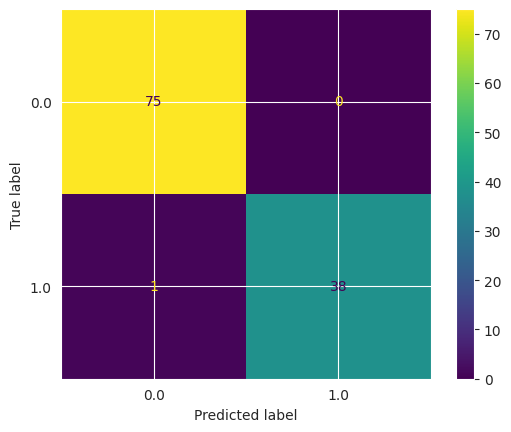

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('cancer_diagnosis_model.pkl', 'wb'))



---

